## Assignment VI - Combinatorial Optimization

### Multiobjective Optimization

**Author:** Guilherme Cadori

**Date:** 21/08/2023


### Fitness Assignment

According to Talbi (2009), dominance-based approaches use the concept of dominance in the fitness assignment. Diferently from other approaches that use a scalarization function or that treat the various objectives separately, dominance-based approaches do not requiere the transformation of a Multiobjective Optimization Problem into a proxy Monoobjective Problem. This approach makes it possible to generate a diverse set of Pareto optimal solutions and Pareto solutions in the concave portions of the convex hull of the feasible solution space.

**Reference:** Metaheuristics - From Design to Implementation (2009).

### Creating Problem Data and Parameters

In [1]:
# Importing packages
import numpy as np


In [2]:
# Creating multiple objective functions
objFunction_1 = np.array([0.30876, 0.27366, 0.40452, 0.78949, 0.99419, 0.26734, 0.13833, 0.13833, 0.91129, 0.10879,
                          0.45288, 0.63730, 0.08602, 0.81526, 0.05092, 0.77633, 0.85511, 0.17230, 0.89771, 0.84468])

objFunction_2 = np.array([0.78949, 0.99419, 0.26734, 0.13833, 0.91129, 0.10879, 0.45288, 0.63730, 0.08602, 0.81526,
                          0.05092, 0.77633, 0.85511, 0.87917, 0.17230, 0.89771, 0.84468, 0.30876, 0.27366, 0.40452])

objFunction_3 = np.array([0.91129, 0.10879, 0.45288, 0.63730, 0.08602, 0.81526, 0.05092, 0.77633, 0.85511, 0.87917,
                          0.17230, 0.89771, 0.84468, 0.30876, 0.27366, 0.40452, 0.78949, 0.99419, 0.26734, 0.13833])


In [3]:
# Creating a set to store all feasible solutions provided
solutionSet = np.array([[0,0,0,1,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,0], [0,0,1,1,0,1,1,1,0,1,1,0,1,0,0,1,1,1,1,0],
                        [0,0,1,1,1,0,1,1,0,0,1,0,0,0,1,1,1,1,1,1], [0,0,1,1,1,1,0,1,0,1,0,0,1,0,1,1,1,1,1,1],
                        [0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,1,1,0,1], [0,1,0,0,1,1,0,1,1,1,0,0,1,0,1,1,0,0,1,0],
                        [0,1,0,1,0,0,0,0,1,1,0,1,1,1,0,1,1,1,1,1], [0,1,0,1,0,1,0,1,1,1,0,1,1,0,1,0,1,1,1,0],
                        [0,1,0,1,1,0,1,1,0,0,0,1,0,0,1,1,1,1,0,1], [0,1,0,1,1,1,0,1,0,0,1,0,1,0,1,1,1,0,1,1],
                        [0,1,1,0,1,0,1,1,0,1,1,1,0,1,1,0,0,0,1,1], [0,1,1,1,1,0,0,1,0,1,0,0,1,0,1,1,1,0,1,1],
                        [0,1,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,1,1,1], [0,1,1,1,1,1,0,1,0,0,1,0,1,0,1,1,1,0,1,1],
                        [0,1,1,1,1,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1], [0,1,1,1,1,1,0,1,0,1,0,0,1,0,1,1,1,0,1,1],
                        [1,0,0,0,1,0,0,1,0,1,1,1,1,0,1,1,1,1,1,1], [1,0,0,1,0,0,0,1,0,0,0,1,1,0,1,1,1,1,0,0],
                        [1,0,0,1,1,0,1,1,1,0,0,0,0,1,1,1,1,1,1,1], [1,0,0,1,1,1,0,1,0,0,1,0,1,0,1,1,1,0,1,1],
                        [1,0,0,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,0,1], [1,0,0,1,1,1,0,1,1,1,0,1,1,0,1,0,1,1,0,1],
                        [1,0,1,0,1,1,0,0,0,1,0,0,1,1,0,1,1,1,0,0], [1,0,1,1,0,0,0,1,1,1,0,1,1,1,0,1,1,1,1,0],
                        [1,0,1,1,0,0,0,1,1,1,0,1,1,1,0,1,1,1,1,0], [1,0,1,1,0,1,0,1,1,0,1,1,1,0,0,1,1,1,0,0],
                        [1,0,1,1,1,0,0,1,1,0,1,1,1,1,0,1,1,1,0,0], [1,0,1,1,1,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0],
                        [1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,0,0], [1,1,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,1,1],
                        [1,1,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,1,1], [1,1,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,1,1,0],
                        [1,1,0,0,1,0,1,0,1,1,0,1,1,0,1,0,1,1,0,1], [1,1,0,0,1,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0],
                        [1,1,0,0,1,1,0,1,0,1,1,1,1,0,0,1,1,1,0,1], [1,1,0,1,1,0,0,1,0,0,0,1,1,1,1,1,1,0,1,1],
                        [1,1,0,1,1,0,1,1,0,1,0,1,1,1,0,1,1,0,0,0], [1,1,0,1,1,1,0,1,1,0,0,0,1,1,1,1,1,1,0,0],
                        [1,1,1,0,1,0,1,0,0,0,0,1,1,0,0,1,1,1,1,0], [1,1,1,0,1,0,1,1,0,1,0,1,1,1,0,1,0,1,0,0],
                        [1,1,1,1,0,0,0,0,1,0,1,1,0,0,0,1,1,1,0,1], [1,1,1,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1],
                        [1,1,1,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0], [1,1,1,1,1,0,0,1,1,0,0,1,1,1,0,0,1,0,1,0]])


In [4]:
# Computing OF values for each provided solution
num_solutions = solutionSet.shape[0]
num_objectives = 3  # Number of objective functions

objective_values = np.zeros((num_solutions, num_objectives))

for i in range(num_solutions):
    for j in range(num_objectives):
        objective_values[i, j] = np.sum(solutionSet[i] * [objFunction_1, objFunction_2, objFunction_3][j])

print("Objective Values:\n", objective_values)


Objective Values:
 [[6.44971 5.57593 7.07059]
 [5.08715 5.65074 7.08438]
 [6.51479 5.35969 5.04328]
 [6.38573 6.63505 7.35917]
 [5.203   8.00087 5.3812 ]
 [4.50458 5.75163 5.31088]
 [7.16794 7.27374 7.12539]
 [5.18826 6.01073 8.13903]
 [5.67064 6.53829 5.15726]
 [6.42666 6.2888  5.31402]
 [5.75657 6.63516 4.41221]
 [6.21975 7.21169 5.65851]
 [6.90857 7.29068 6.30182]
 [6.83118 6.55614 5.7669 ]
 [5.96674 6.46986 6.98694]
 [6.48709 7.32048 6.47377]
 [6.32332 7.73733 7.43503]
 [3.81456 5.42001 6.52917]
 [7.6927  6.79611 6.49326]
 [6.46176 6.0841  6.11652]
 [6.901   7.78038 8.82233]
 [6.16452 6.84818 8.89854]
 [4.78862 6.6776  6.48626]
 [6.90121 7.56916 9.01877]
 [6.90121 7.56916 9.01877]
 [5.79967 5.76078 8.55106]
 [7.34178 7.44245 8.13058]
 [6.96372 8.35091 7.89418]
 [6.73035 7.17857 8.52206]
 [6.79157 8.70632 7.23244]
 [6.79157 8.70632 7.23244]
 [5.95497 7.98327 5.66371]
 [5.38135 7.41083 6.82936]
 [6.04337 8.93943 6.91279]
 [5.91569 8.39435 7.81808]
 [7.46776 8.57408 6.44422]
 [5.92157

### Fitness Assignment: Dominance-Based Approaches

#### *Dominance Rank*

In this strategy, the rank associated with a solution is related to the number of solutions in the population that dominates the considered solution (Talbi, 2009). This definition could also be interpreted as "how many solutions dominte a given solution". The less dominated, the better that solution is.


In [6]:
# Dominance Rank - Ranking all solutions and dentifying Pareto frontier solutions
# Calculating the dominance rank for each solution
num_solutions = solutionSet.shape[0]
dominance_rank = np.zeros(num_solutions)

for i in range(num_solutions):
    for j in range(num_solutions):
        if i != j:
            if np.all(objective_values[j] >= objective_values[i]) and np.any(objective_values[j] > objective_values[i]):
                dominance_rank[i] += 1

# Outputting Pareto optimal solutions according to their dominance hierarchy
# Printing Pareto optimal solutions
print("Pareto Optimal Solutions:")
for i in range(num_solutions):
    if dominance_rank[i] == 0:
        print(f" Soluttion ID: {i + 1}, Dominance Rank: {dominance_rank[i] + 1}, Objetive Values: {objective_values[i]}")

# Printing the solution ID and dominance rank for each solution
print("\nAll Solutions and Dominance Rank:")
for i in range(num_solutions):
    print(f" Solution ID: {i + 1}, Dominance Rank: {dominance_rank[i] + 1}")


Pareto Optimal Solutions:
 Soluttion ID: 19, Dominance Rank: 1.0, Objetive Values: [7.6927  6.79611 6.49326]
 Soluttion ID: 21, Dominance Rank: 1.0, Objetive Values: [6.901   7.78038 8.82233]
 Soluttion ID: 24, Dominance Rank: 1.0, Objetive Values: [6.90121 7.56916 9.01877]
 Soluttion ID: 25, Dominance Rank: 1.0, Objetive Values: [6.90121 7.56916 9.01877]
 Soluttion ID: 27, Dominance Rank: 1.0, Objetive Values: [7.34178 7.44245 8.13058]
 Soluttion ID: 28, Dominance Rank: 1.0, Objetive Values: [6.96372 8.35091 7.89418]
 Soluttion ID: 30, Dominance Rank: 1.0, Objetive Values: [6.79157 8.70632 7.23244]
 Soluttion ID: 31, Dominance Rank: 1.0, Objetive Values: [6.79157 8.70632 7.23244]
 Soluttion ID: 34, Dominance Rank: 1.0, Objetive Values: [6.04337 8.93943 6.91279]
 Soluttion ID: 35, Dominance Rank: 1.0, Objetive Values: [5.91569 8.39435 7.81808]
 Soluttion ID: 36, Dominance Rank: 1.0, Objetive Values: [7.46776 8.57408 6.44422]
 Soluttion ID: 37, Dominance Rank: 1.0, Objetive Values: [5.9

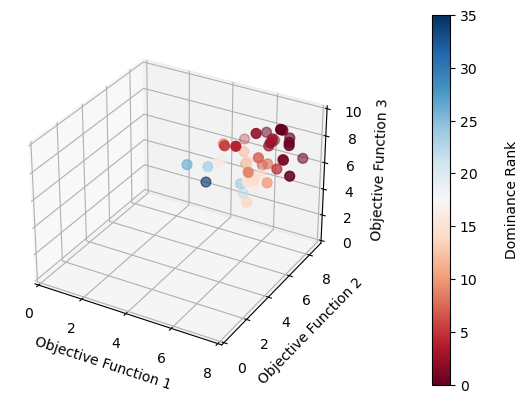

In [7]:
# Plotting graph - Dominance Rank
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math as mt

# Creating a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Setting axes labels
ax.set_xlabel("Objective Function 1")
ax.set_ylabel("Objective Function 2")
ax.set_zlabel("Objective Function 3")

# Plotting each solution with a color based on its dominance rank
scatter = ax.scatter(objective_values[:, 0], 
                     objective_values[:, 1], 
                     objective_values[:, 2], 
                     c = dominance_rank, 
                     cmap = "RdBu", 
                     s = 50)

# Setting axes limits
ax.set_xlim(0, mt.ceil(np.max(objective_values[:, 0])))
ax.set_ylim(0, mt.ceil(np.max(objective_values[:, 1])))
ax.set_zlim(0, mt.ceil(np.max(objective_values[:, 2])))


# Creating color bar for dominance ranks
cbar = plt.colorbar(scatter, pad = 0.18)
cbar.set_label("Dominance Rank", labelpad = 20)

# Displaying plot
plt.show()


#### *Dominance Depth*

The population of solutions is decomposed into several fronts. The nondominated solutions of the population receive rank 1 and form the first front E1. The solutions that are not dominated except by solutions of E1 receive rank 2; they form the second front E2. In a general way, the depth of a solution corresponds to the depth of the front to which it belongs (Talbi, 2009). Dominance "layers" are created and the most dominant layers encompass the less dominant ones.


In [8]:
# Initializing the list of fronts
fronts = []

# Initializing the set of non-dominated solutions
remaining_indices = set(range(num_solutions))

front_idx = 1

while remaining_indices:
    # Finding Pareto optimal solutions for the current front
    pareto_front = []
    for i in remaining_indices:
        is_dominated = False
        for j in remaining_indices:
            if i != j and np.all(objective_values[j] >= objective_values[i]) and np.any(objective_values[j] > objective_values[i]):
                is_dominated = True
                break
        if not is_dominated:
            pareto_front.append(i)
    
    # Assigning the front rank to the Pareto optimal solutions
    for idx in pareto_front:
        fronts.append((front_idx, idx))
        remaining_indices.discard(idx)
    
    # Incrementing the front index for the next iteration
    front_idx += 1

# Counting and printing the number of solutions in each front
front_count = {}
for solution_rank, _ in fronts:
    front_count[solution_rank] = front_count.get(solution_rank, 0) + 1

print("Count of Solutions in each Front:")

for rank, count in front_count.items():
    print(f" Front {rank}: {count} solutions")

# Outputting solutions according to their dominance depth
# Print the solution ID and dominance depth for each solution
print("\nList of Solutions in Each Front")

for solution_rank, solution_idx in fronts:
    print(f" Solution ID: {solution_idx + 1}, Dominance Depth: {solution_rank}")


Count of Solutions in each Front:
 Front 1: 13 solutions
 Front 2: 10 solutions
 Front 3: 10 solutions
 Front 4: 8 solutions
 Front 5: 2 solutions
 Front 6: 1 solutions

List of Solutions in Each Front
 Solution ID: 19, Dominance Depth: 1
 Solution ID: 21, Dominance Depth: 1
 Solution ID: 24, Dominance Depth: 1
 Solution ID: 25, Dominance Depth: 1
 Solution ID: 27, Dominance Depth: 1
 Solution ID: 28, Dominance Depth: 1
 Solution ID: 30, Dominance Depth: 1
 Solution ID: 31, Dominance Depth: 1
 Solution ID: 34, Dominance Depth: 1
 Solution ID: 35, Dominance Depth: 1
 Solution ID: 36, Dominance Depth: 1
 Solution ID: 37, Dominance Depth: 1
 Solution ID: 44, Dominance Depth: 1
 Solution ID: 5, Dominance Depth: 2
 Solution ID: 7, Dominance Depth: 2
 Solution ID: 13, Dominance Depth: 2
 Solution ID: 16, Dominance Depth: 2
 Solution ID: 17, Dominance Depth: 2
 Solution ID: 22, Dominance Depth: 2
 Solution ID: 29, Dominance Depth: 2
 Solution ID: 32, Dominance Depth: 2
 Solution ID: 38, Domin

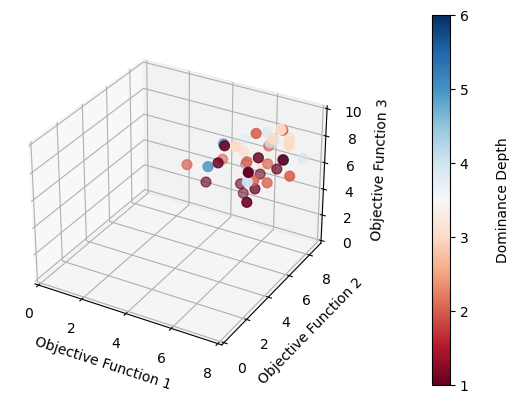

In [175]:
# Plotting graph - Dominance Depth
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math as mt

# Creating a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Setting axes labels
ax.set_xlabel("Objective Function 1")
ax.set_ylabel("Objective Function 2")
ax.set_zlabel("Objective Function 3")

# Plotting each solution with a color based on its Dominance Depth
scatter = ax.scatter(objective_values[:, 0], 
                     objective_values[:, 1], 
                     objective_values[:, 2], 
                     c=[depth[0] for depth in fronts],  # Use Dominance Depth values from fronts
                     cmap="RdBu", 
                     s=50)

# Setting axes limits
ax.set_xlim(0, mt.ceil(np.max(objective_values[:, 0])))
ax.set_ylim(0, mt.ceil(np.max(objective_values[:, 1])))
ax.set_zlim(0, mt.ceil(np.max(objective_values[:, 2])))

# Creating color bar for Dominance Depth
cbar = plt.colorbar(scatter, pad = 0.18)
cbar.set_label("Dominance Depth", labelpad = 20)

# Displaying plot
plt.show()


#### *Dominance Count*

The dominance count of a solution is related to the number of solutions dominated by the solution (Talbi, 2009). In other words, the more solutions a given solutio dominates, the better that given solution is.


In [9]:
# Initializing dominance count and rank for each solution
dominance_count = np.zeros(num_solutions, dtype = int)
dominance_rank = np.ones(num_solutions, dtype = int)

# Calculating dominance count for each solution
for i in range(num_solutions):
    for j in range(num_solutions):
        if i != j:
            if np.all(objective_values[i] >= objective_values[j]) and np.any(objective_values[i] > objective_values[j]):
                dominance_count[i] += 1

# Adjusting dominance rank based on dominance count
sorted_indices = np.argsort(dominance_count)[::-1]  # Sorting indices in descending order of dominance count
for i, idx in enumerate(sorted_indices):
    dominance_rank[idx] = i + 1

# Ordering outputs based on dominance rank
output_data = [(i + 1, dominance_count[i], dominance_rank[i]) for i in range(num_solutions)]
ordered_output_data = sorted(output_data, key=lambda x: x[2])  # Sort by dominance rank

# Printing the ordered solution data
for data in ordered_output_data:
    print(f"Solution ID: {data[0]}, Dominance Count: {data[1]}, Dominance Rank: {data[2]}")


Solution ID: 21, Dominance Count: 25, Dominance Rank: 1
Solution ID: 28, Dominance Count: 25, Dominance Rank: 2
Solution ID: 24, Dominance Count: 24, Dominance Rank: 3
Solution ID: 25, Dominance Count: 24, Dominance Rank: 4
Solution ID: 27, Dominance Count: 22, Dominance Rank: 5
Solution ID: 31, Dominance Count: 20, Dominance Rank: 6
Solution ID: 30, Dominance Count: 20, Dominance Rank: 7
Solution ID: 44, Dominance Count: 16, Dominance Rank: 8
Solution ID: 29, Dominance Count: 16, Dominance Rank: 9
Solution ID: 7, Dominance Count: 15, Dominance Rank: 10
Solution ID: 38, Dominance Count: 15, Dominance Rank: 11
Solution ID: 36, Dominance Count: 13, Dominance Rank: 12
Solution ID: 17, Dominance Count: 11, Dominance Rank: 13
Solution ID: 22, Dominance Count: 11, Dominance Rank: 14
Solution ID: 34, Dominance Count: 11, Dominance Rank: 15
Solution ID: 35, Dominance Count: 11, Dominance Rank: 16
Solution ID: 19, Dominance Count: 9, Dominance Rank: 17
Solution ID: 13, Dominance Count: 8, Domin

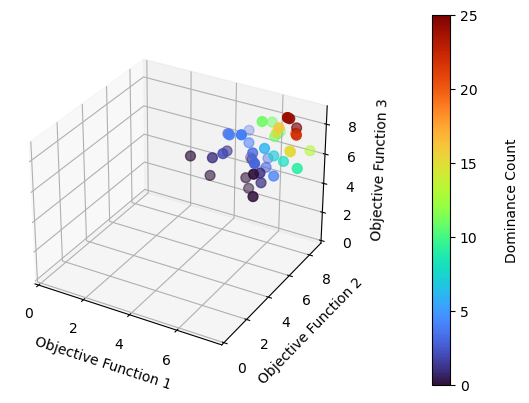

In [10]:
# Plotting graph - Dominance Count
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Creating a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")

# Setting axes labels
ax.set_xlabel("Objective Function 1")
ax.set_ylabel("Objective Function 2")
ax.set_zlabel("Objective Function 3")

# Plotting each solution with a color based on its Dominance Count
scatter = ax.scatter(objective_values[:, 0], 
                     objective_values[:, 1], 
                     objective_values[:, 2], 
                     c = dominance_count, 
                     cmap = "turbo", 
                     s = 50)

# Setting axes limits
ax.set_xlim(0, np.max(objective_values[:, 0]))
ax.set_ylim(0, np.max(objective_values[:, 1]))
ax.set_zlim(0, np.max(objective_values[:, 2]))

# Creating color bar for Dominance Count
cbar = plt.colorbar(scatter, pad = 0.18)
cbar.set_label("Dominance Count", labelpad = 20)

# Displaying plot
plt.show()


### End Of The Assignment